회전하는 원반을 이용하여 복권번호 결정하는 문제

기댓값: $E[X] = xp(x)$ 의 면적

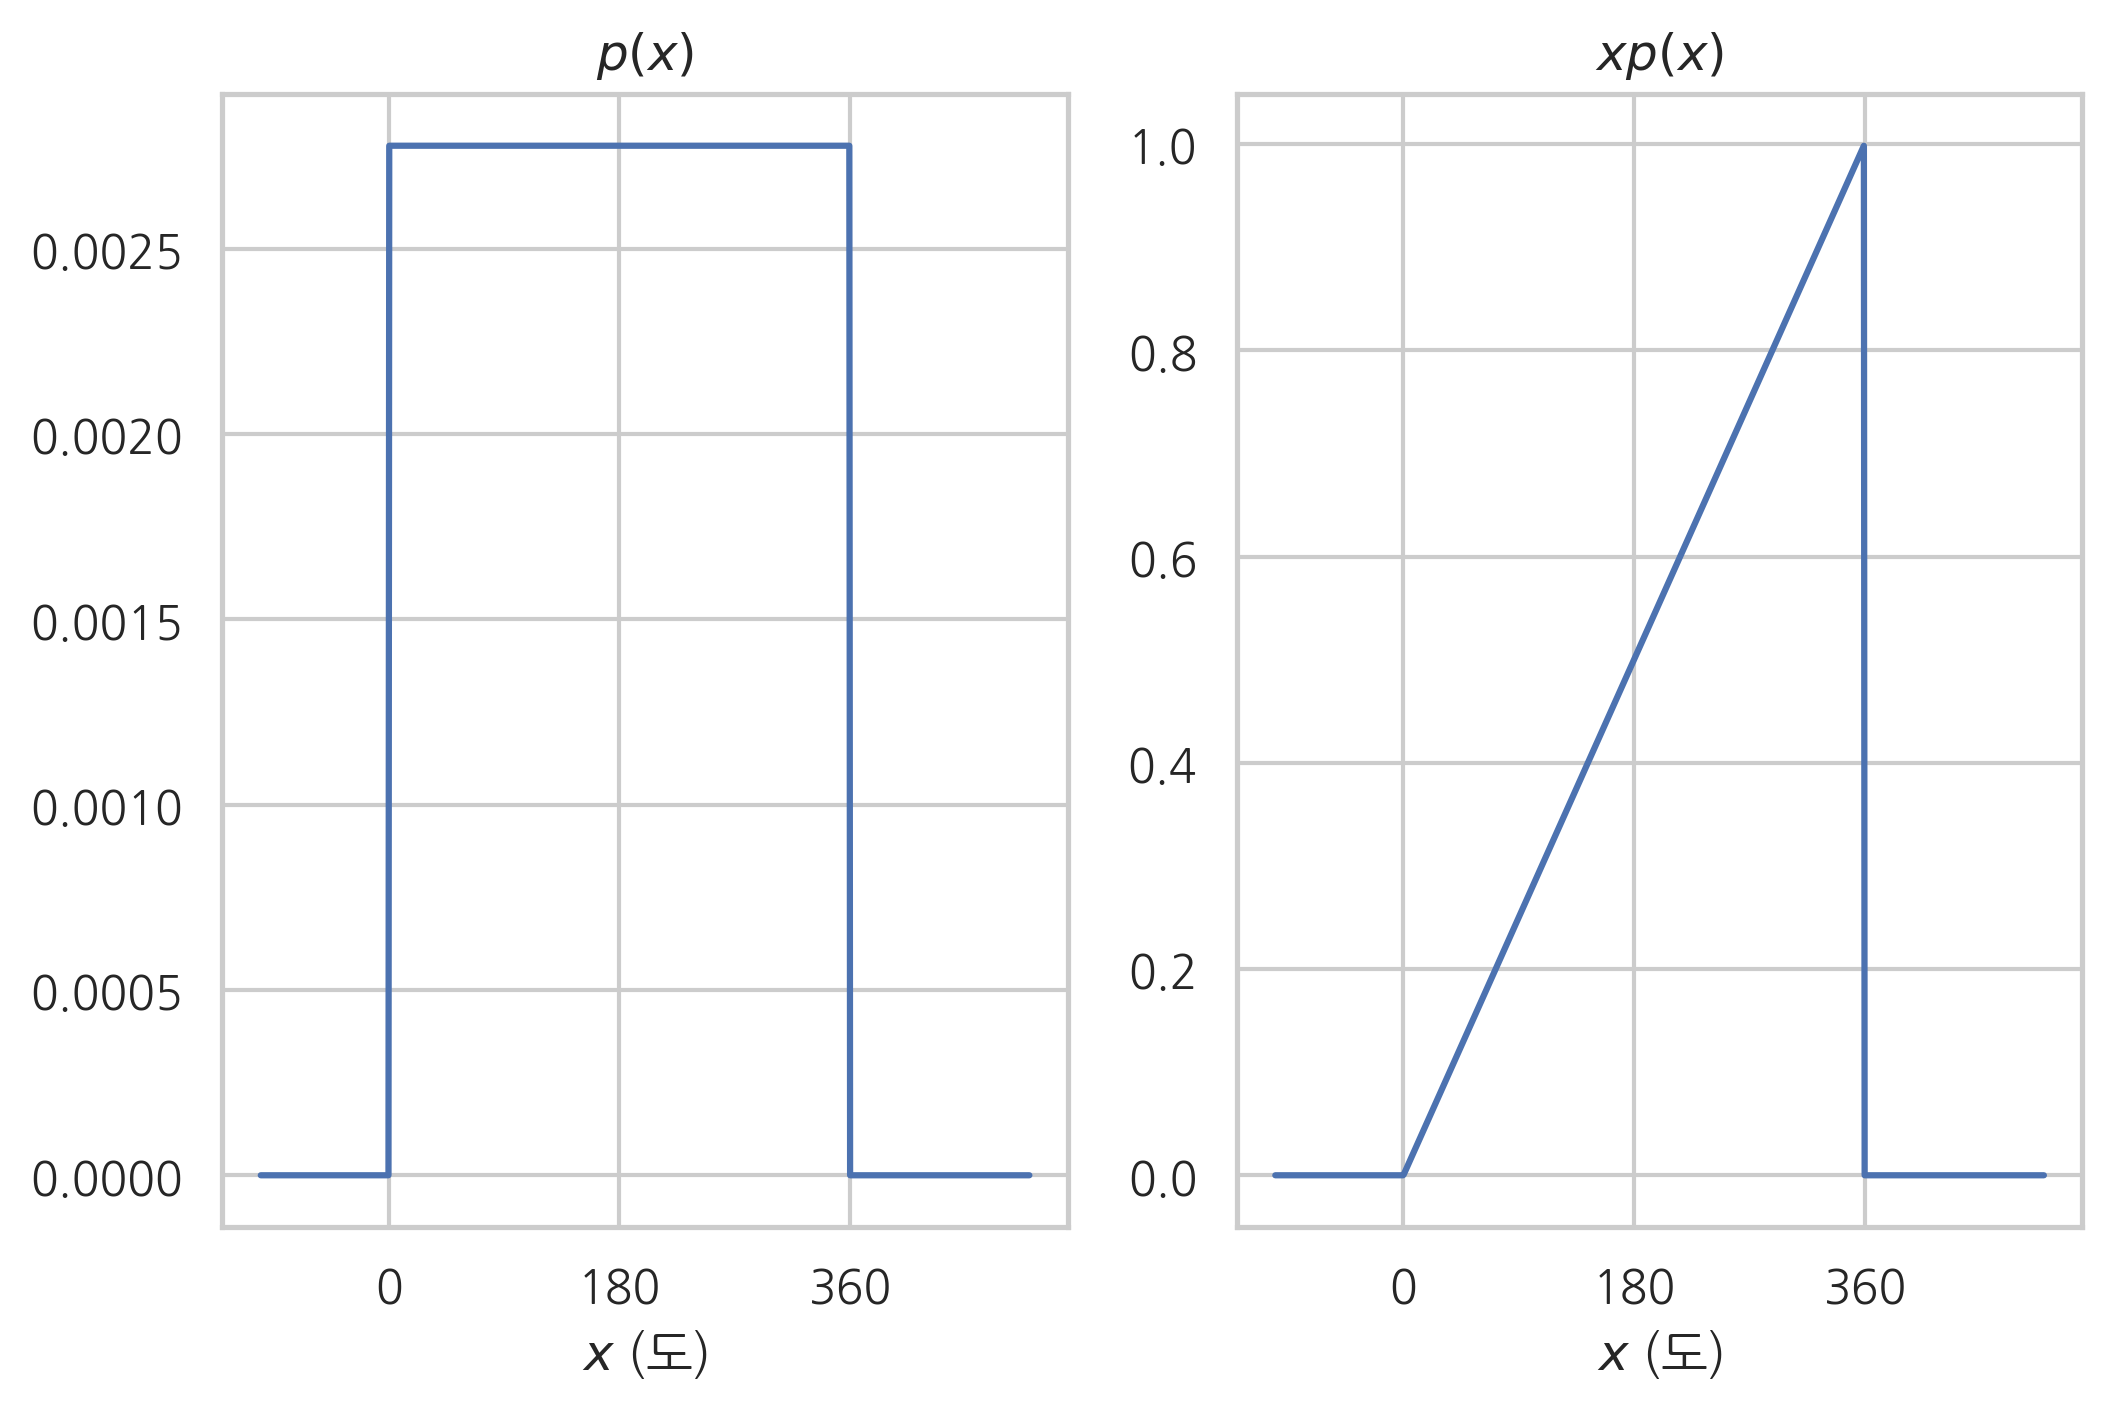

In [4]:
x = np.linspace(-100, 500, 1000)
p = np.zeros_like(x)
p[(0 < x) & (x <= 360)] = 1/360
xp = x * p

plt.subplot(121)
plt.plot(x, p)
plt.xticks([0, 180, 360]);# plt.yticks([0, 1/360])
plt.title('$p(x)$')
plt.xlabel('$x$ (도)')

plt.subplot(122)
plt.plot(x, xp)
plt.xticks([0, 180, 360])
plt.title('$xp(x)$')
plt.xlabel('$x$ (도)')

plt.show()

0 ~ 180도에서 2배 더 잘 박히도록 원반이 조작 되었다면

In [15]:
p2 = np.zeros_like(x)
p2[(0 < x) & (x <= 180)] = 1/360 * 2/3
p2[(180 < x) & (x < 360)] = 1/360 * 1/3
xp2 = x * p2

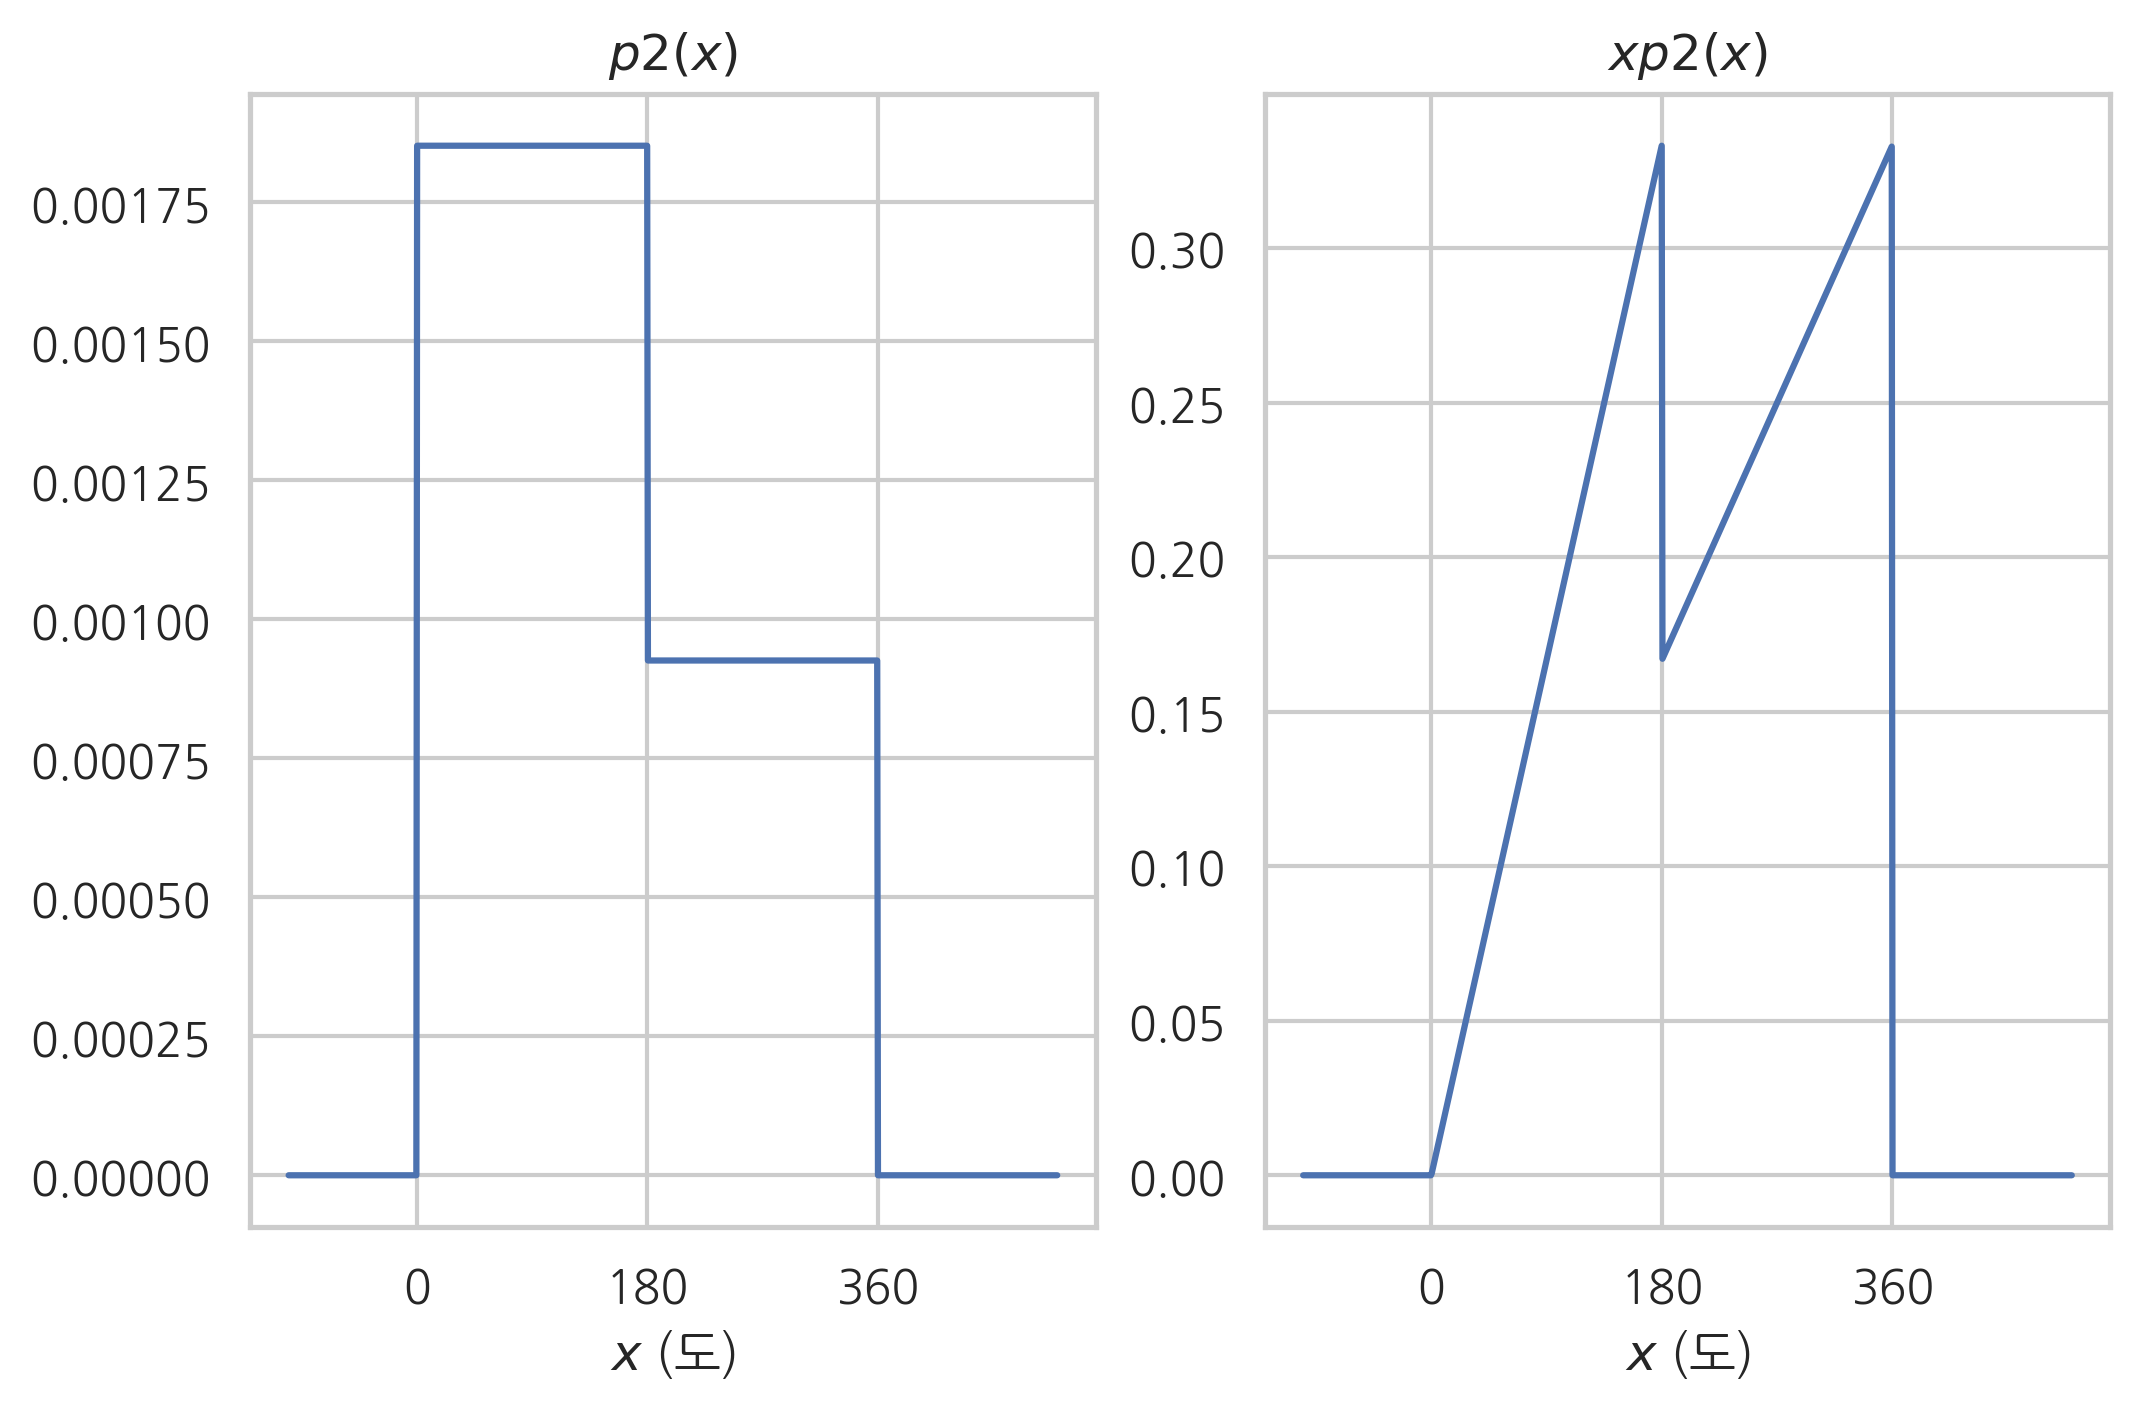

In [16]:
plt.subplot(121)
plt.plot(x, p2)
plt.xticks([0, 180, 360]);# plt.yticks([0, 1/360])
plt.title('$p2(x)$')
plt.xlabel('$x$ (도)')

plt.subplot(122)
plt.plot(x, xp2)
plt.xticks([0, 180, 360])
plt.title('$xp2(x)$')
plt.xlabel('$x$ (도)')

plt.show()

**[연습문제 7.2.4]** 확률변수  X 는 주사위를 던져 나오는 수를 나타내는 확률변수다. 그리고  Y 는 주사위를 던져나오는 수에 2배를 한 수를 나타내는 확률변수다.  X ,  Y 의 확률질량함수의 그래프를 각각 그려라.

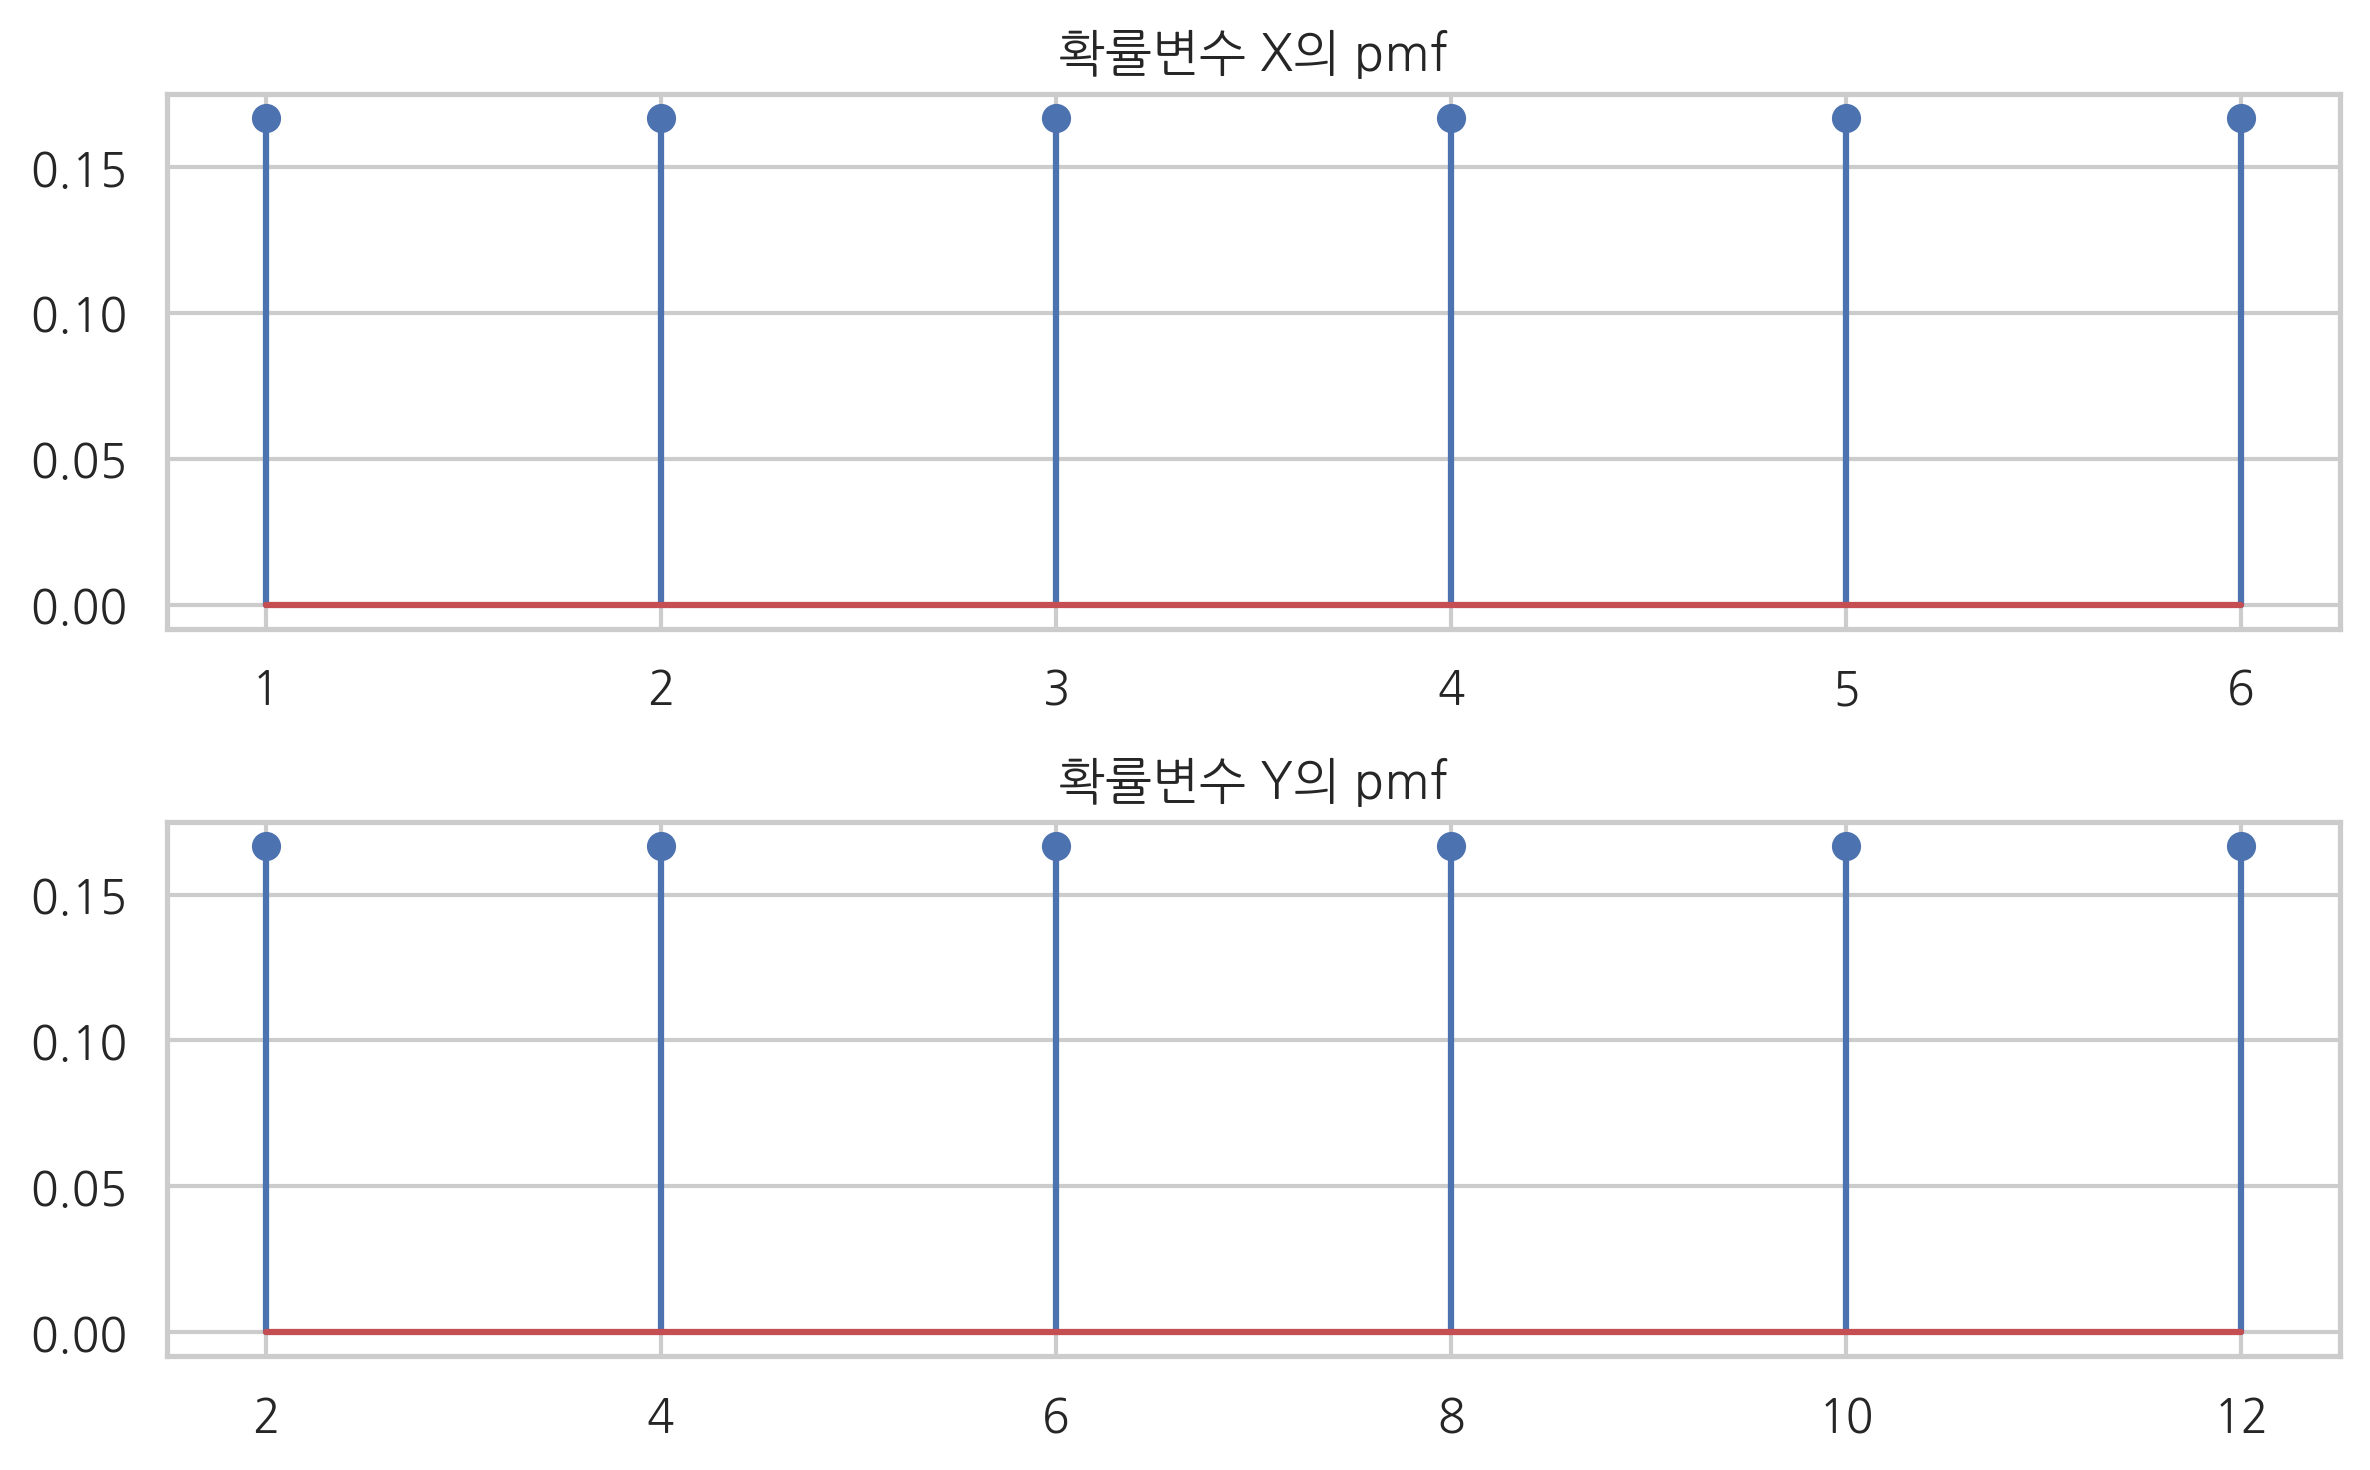

In [38]:
X = np.arange(1, 7)
Y = X * 2
p = 1 / 6 * np.ones_like(X)
plt.subplot(211)
plt.stem(X, p)
plt.title('확률변수 X의 pmf')

plt.subplot(212)
plt.stem(Y, p)
plt.title('확률변수 Y의 pmf')

plt.tight_layout()
plt.show()

**[연습문제 7.2.5]**
확률변수  X1 과  X2 는 각각 주사위를 던져 나오는 수를 나타내는 확률변수다. 그리고  Y 는 두 주사위를 동시에 던져 나오는 수의 합을 나타내는 확률변수다. 확률변수  X1 ,  X2 ,  Y 의 확률질량함수의 그래프를 각각 그려라.

In [50]:
# sum_list = []
# X1 = np.arange(1, 7)
# X2 = np.arange(1, 7)
# for i in X1:
#     for j in X2:
#         sum_list.append(i + j)
#         j += 1
#     i += 1
# sum_list    

In [14]:
from itertools import product
from collections import Counter

x1 = np.linspace(1, 6, 6)
px1 = np.ones_like(x1) / 6
x2 = np.linspace(1, 6, 6)
px2 = np.ones_like(x1) / 6

c = Counter([sum(x) for x in product(x1, x2)])
y  = list(c.keys())
py = np.array(list(c.values())/np.sum([v for v in c]))
py

array([0.01298701, 0.02597403, 0.03896104, 0.05194805, 0.06493506,
       0.07792208, 0.06493506, 0.05194805, 0.03896104, 0.02597403,
       0.01298701])

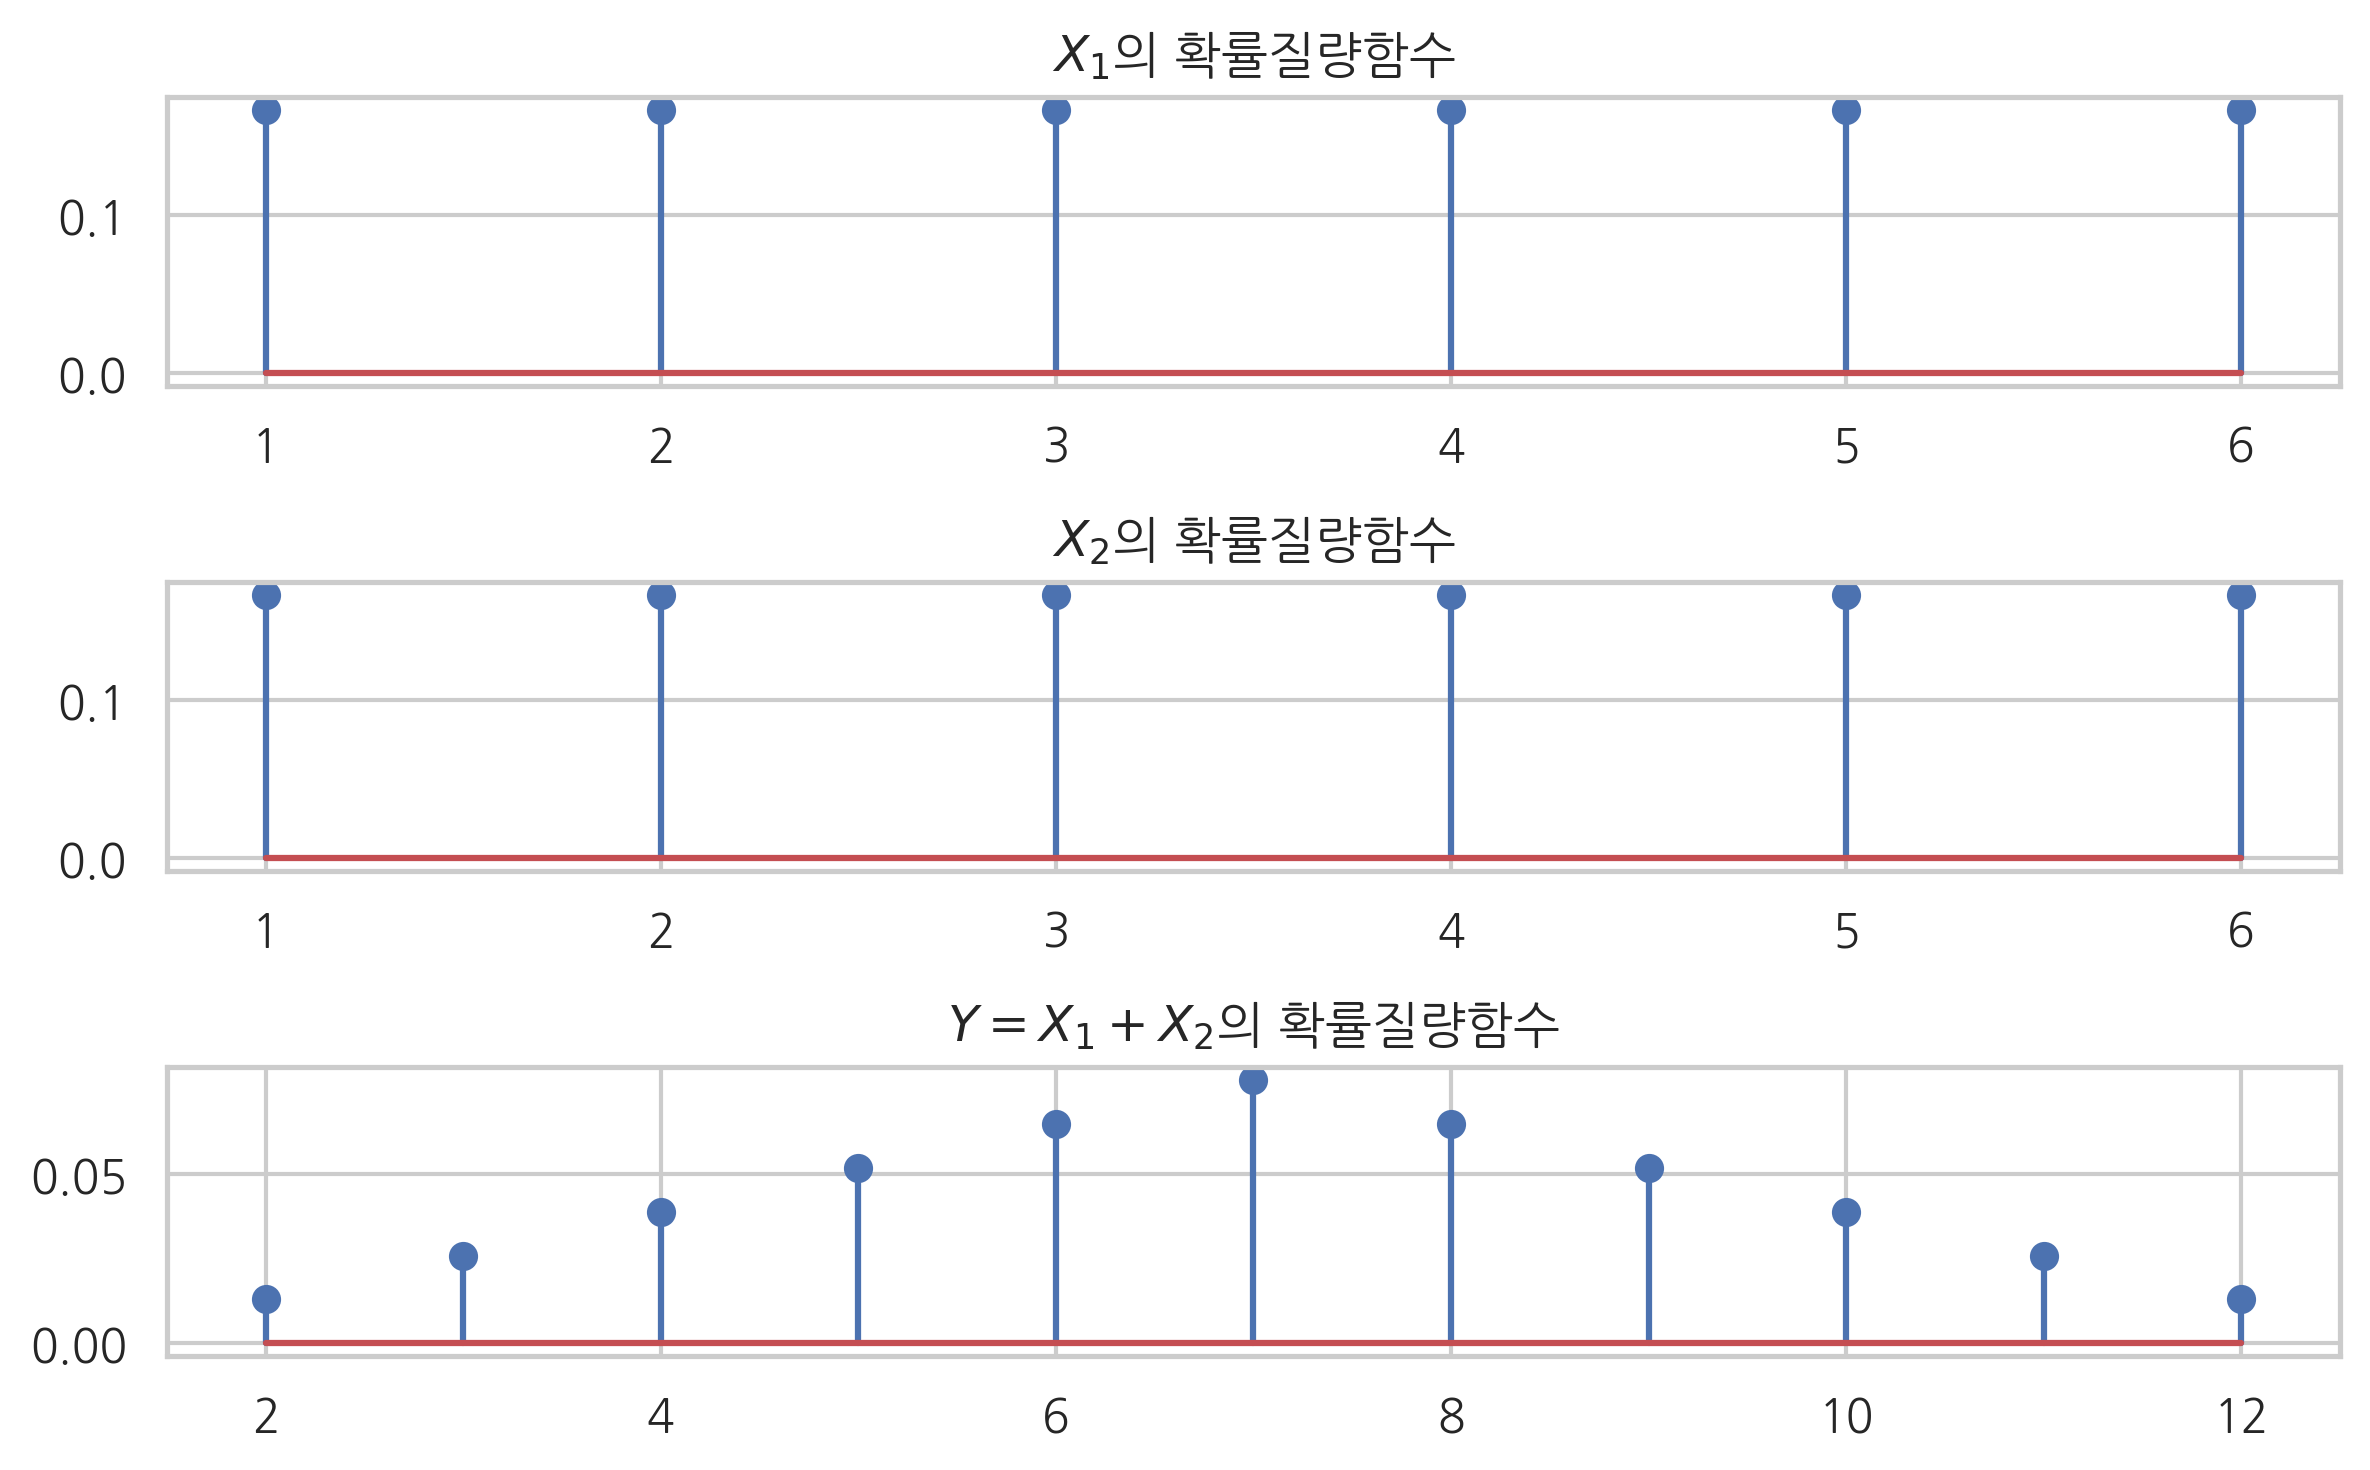

In [16]:
plt.subplot(311)
plt.stem(x1, px1)
plt.title('$X_1$의 확률질량함수')

plt.subplot(312)
plt.stem(x2, px2)
plt.title('$X_2$의 확률질량함수')

plt.subplot(313)
plt.stem(y, py)
plt.title("$Y=X_1+X_2$의 확률질량함수")

plt.tight_layout()
plt.show()

### itertools module


In [91]:
item = ['abc', '123', 'ABC']

In [92]:
from itertools import product
print(list(product(item)), end='\n\n')
print(list(product(*item)))
# 2차원 배열에 대한 3개로 구성된 모든 조합(순서구분)

[('abc',), ('123',), ('ABC',)]

[('a', '1', 'A'), ('a', '1', 'B'), ('a', '1', 'C'), ('a', '2', 'A'), ('a', '2', 'B'), ('a', '2', 'C'), ('a', '3', 'A'), ('a', '3', 'B'), ('a', '3', 'C'), ('b', '1', 'A'), ('b', '1', 'B'), ('b', '1', 'C'), ('b', '2', 'A'), ('b', '2', 'B'), ('b', '2', 'C'), ('b', '3', 'A'), ('b', '3', 'B'), ('b', '3', 'C'), ('c', '1', 'A'), ('c', '1', 'B'), ('c', '1', 'C'), ('c', '2', 'A'), ('c', '2', 'B'), ('c', '2', 'C'), ('c', '3', 'A'), ('c', '3', 'B'), ('c', '3', 'C')]


In [93]:
from itertools import permutations
print(list(permutations(item[0], 2)))
# ['a', 'b', 'c']인 배열에 대해 2개로 구성되는 중복을 포함한 모든 조합(순서구분)

[('a', 'b'), ('a', 'c'), ('b', 'a'), ('b', 'c'), ('c', 'a'), ('c', 'b')]


In [94]:
from itertools import combinations
print(list(combinations(item[0], 2)))
# ['a', 'b', 'c']인 배열에 대해 2개로 구성되는 중복되지 않는 모든 조합(순서무관)

[('a', 'b'), ('a', 'c'), ('b', 'c')]


**[연습 문제 7.3.2]**
1. 넘파이를 사용하여 숫자 100개를 무작위로 생성하여 표본집합을 구한다. 이 표본집합을 확률변수  X1 의 표본이라고 하자.
2. 같은 방식으로 숫자 100개를 생성하며 확률변수  X2 의 표본집합을 구한다.
3. 두 확률변수의 표본 쌍의 값을 더하여 확률변수  X1+X2 의 표본집합을 구한다.
4. X1+X2 의 표본분산과  X1 ,  X2 의 표본분산값의 합을 각각 계산하여 두 값이 비슷함을 보여라.

In [64]:
np.random.seed(0)
X1 = np.random.normal(size=100)
X2 = np.random.normal(size=100)

In [65]:
X3 = X1 + X2

In [66]:
print(np.var(X1) + np.var(X2))
print(np.var(X3))

2.086362414803172
2.3193898587605104


**[연습 문제 7.3.3]**

(1) 넘파이를 사용하여 숫자 100개를 무작위로 생성하여 표본집합을 구한다. 이 표본집합을 확률변수  X1 의 표본이라고 하자.  X1 의 표본분산을 계산한다.

(2) 같은 작업을 50번 반복하여 확률변수  X2,X3,…,X50 의 표본집합을 구한다.

(3) 확률변수  Xi 의 표본집합의 표본평균  x¯i 를 각각 계산한다. 이 값들은 표본평균 확률변수  X¯ 의 표본집합이다.

(4) 확률변수  X¯ 의 표본분산값을 계산하고  X1 의 표본분산과의 비율을 계산한다

In [69]:
np.random.seed(1)
X_mean_list = []
for i in range(50):
    X = np.random.normal(size=100)
    X_mean = np.mean(X)
    X_mean_list.append(X_mean)
X_mean_list
np.var(X_mean_list), np.var(X)

(0.010582116208413182, 1.2274931730708247)

In [71]:
np.var(X) / np.var(X_mean_list)

115.99694700904166

표본분산은 실제 분산보다 작아짐

In [73]:
np.random.seed(15)
N = 7
data = np.sort(np.random.normal(size=(N)))[::-1]
data

array([ 0.33928471,  0.23556889, -0.15590853, -0.31232848, -0.50178967,
       -1.09586204, -1.76360526])

In [74]:
mean = np.mean(data)
mean
# 음수인 표본이 많이 나와서 원래의 기댓값인 0보다 음수쪽으로 떨어진 값이 나옴

-0.46494862738581794

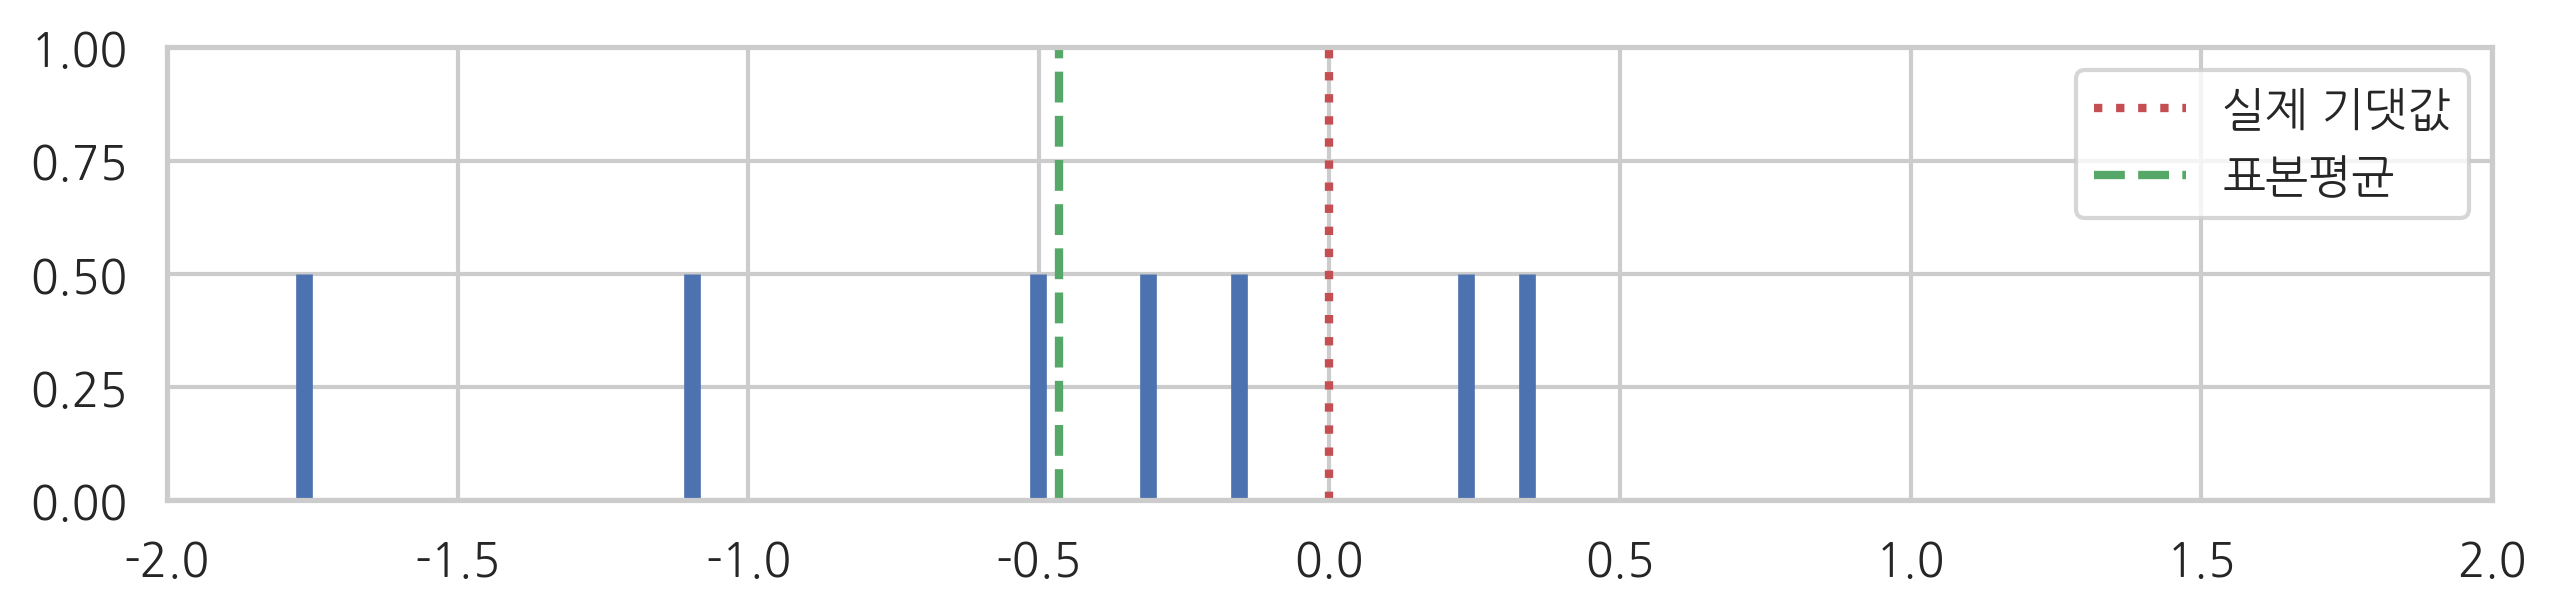

In [76]:
plt.figure(figsize=(10, 2))
sns.rugplot(data, height=0.5, linewidth=4)
x = np.linspace(-3, 3, 100)
plt.axvline(x=0, ls=':', c='r', linewidth=2, label='실제 기댓값')
plt.axvline(x=mean, ls='--', c='g', linewidth=2, label='표본평균')
plt.legend()
plt.xlim(-2, 2)
plt.show()

In [77]:
distance_from_sample_mean = data - mean
distance_from_sample_mean

array([ 0.80423333,  0.70051752,  0.30904009,  0.15262015, -0.03684105,
       -0.63091342, -1.29865663])

In [79]:
sample_variance = (distance_from_sample_mean ** 2).mean()
sample_variance
# 표본표준편차

0.4774618257836171

In [80]:
sample_variance * N / (N- 1)
# 비편향 표본분산

0.5570387967475533